## Data Preparation

In [2]:
# Install Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Sklearn for modeling
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss, f1_score, confusion_matrix

import time # For tracking and measuring execution time
#warnings.filterwarnings('ignore')
#sns.set_style('whitegrid')

In [31]:
#Reading the data into dataframes
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5]:
# Top Five Rows of Training and Testing Data

print("="*50 + "TRAIN DATA" + "="*50)
display(train.head())
print("="*50 + "TEST DATA" + "="*50)
display(test.head())

==================================================TRAIN DATA==================================================


,ID,user_id,confidence,predicted_intensity,community,district,prediction_time,indicator,indicator_description,time_observed,Target,forecast_length
0,ID_KwcTp_12,11,0.3,0.0,Tumfa,atiwa_west,2025-05-30 11:09:33,NaN,NaN,NaN,MEDIUMRAIN,12
1,ID_K9vWT_12,17,0.3,0.0,Kwabeng,atiwa_west,2025-05-30 11:09:35,NaN,NaN,NaN,HEAVYRAIN,12
2,ID_AIQg3_12,19,0.3,0.0,Akropong,atiwa_west,2025-05-30 11:09:47,NaN,NaN,NaN,MEDIUMRAIN,12
3,ID_px4yf_12,23,0.3,0.0,Asamama,atiwa_west,2025-05-30 11:16:33,NaN,NaN,NaN,HEAVYRAIN,12
4,ID_QYYmK_12,23,0.3,0.0,Asamama,atiwa_west,2025-05-30 11:16:55,NaN,NaN,NaN,HEAVYRAIN,12


==================================================TEST DATA==================================================


,ID,user_id,confidence,predicted_intensity,community,district,prediction_time,indicator,indicator_description,time_observed,forecast_length
0,ID_SbTdy_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:28,NaN,NaN,NaN,24
1,ID_SBKYz_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:29,NaN,NaN,NaN,24
2,ID_fAimg_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:30,NaN,NaN,NaN,24
3,ID_2wBqC_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:31,NaN,NaN,NaN,24
4,ID_NItox_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:32,NaN,NaN,NaN,24


In [9]:
# Statistical Summary of Numerical and Categorical Features
print("="*50 + "NUMERIC" + "="*50)
display(train.describe())
print("\n" + "="*50 + "CATEGORICAL" + "="*50)
display(train.describe(include=["O"]))

==================================================NUMERIC==================================================


,user_id,confidence,predicted_intensity,forecast_length
count,10928.000000,10928.000000,10928.000000,10928.000000
mean,40.534407,0.540474,0.026830,19.135432
std,22.970174,0.272068,0.132468,5.891856
min,7.000000,0.300000,0.000000,12.000000
25%,20.000000,0.300000,0.000000,12.000000
50%,43.000000,0.600000,0.000000,24.000000
75%,62.000000,0.600000,0.000000,24.000000
max,90.000000,1.000000,1.000000,24.000000



==================================================CATEGORICAL==================================================


,ID,community,district,prediction_time,indicator,indicator_description,time_observed,Target
count,10928,10928,10928,10928,503,346,72,10928
unique,10928,38,3,10887,10,28,8,4
top,ID_KwcTp_12,Akwaduuso,atiwa_west,2025-06-30 19:16:50,clouds,Clouds moving South → East,EVENING,NORAIN
freq,1,1427,4877,2,266,52,17,9612


In [10]:
# Statistical Summary of Numerical and Categorical Features
print("="*50 + "NUMERIC" + "="*50)
display(test.describe())
print("\n" + "="*50 + "CATEGORICAL" + "="*50)
display(test.describe(include=["O"]))

==================================================NUMERIC==================================================


,user_id,confidence,predicted_intensity,forecast_length
count,2732.000000,2732.000000,2732.000000,2732.000000
mean,43.156662,0.460761,0.027786,18.127379
std,26.611867,0.236471,0.102371,5.999746
min,7.000000,0.300000,0.000000,12.000000
25%,18.000000,0.300000,0.000000,12.000000
50%,26.000000,0.300000,0.000000,24.000000
75%,64.500000,0.600000,0.000000,24.000000
max,95.000000,1.000000,1.000000,24.000000



==================================================CATEGORICAL==================================================


,ID,community,district,prediction_time,indicator,indicator_description,time_observed
count,2732,2732,2732,2732,205,205,205
unique,2732,33,3,2729,9,23,8
top,ID_SbTdy_24,Akwaduuso,assin_fosu,2025-07-23 08:03:10,clouds,Cloud (probably cumulus) without visible sky,EARLY_MORNING
freq,1,774,1257,2,144,49,49


In [11]:
# Information about our dataframes
print("="*50 + "TRAIN INFO" + "="*50)
display(train.info())
print("="*50 + "TEST INFO" + "="*50)
display(test.info())

==================================================TRAIN INFO==================================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10928 entries, 0 to 10927
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10928 non-null  object 
 1   user_id                10928 non-null  int64  
 2   confidence             10928 non-null  float64
 3   predicted_intensity    10928 non-null  float64
 4   community              10928 non-null  object 
 5   district               10928 non-null  object 
 6   prediction_time        10928 non-null  object 
 7   indicator              503 non-null    object 
 8   indicator_description  346 non-null    object 
 9   time_observed          72 non-null     object 
 10  Target                 10928 non-null  object 
 11  forecast_length        10928 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage

None

==================================================TEST INFO==================================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2732 non-null   object 
 1   user_id                2732 non-null   int64  
 2   confidence             2732 non-null   float64
 3   predicted_intensity    2732 non-null   float64
 4   community              2732 non-null   object 
 5   district               2732 non-null   object 
 6   prediction_time        2732 non-null   object 
 7   indicator              205 non-null    object 
 8   indicator_description  205 non-null    object 
 9   time_observed          205 non-null    object 
 10  forecast_length        2732 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 234.9+ KB


None

In [15]:
train.shape, test.shape

((10928, 12), (2732, 11))

In [13]:
train.isnull().sum()

ID                           0
user_id                      0
confidence                   0
predicted_intensity          0
community                    0
district                     0
prediction_time              0
indicator                10425
indicator_description    10582
time_observed            10856
Target                       0
forecast_length              0
dtype: int64

In [14]:
test.isnull().sum()

ID                          0
user_id                     0
confidence                  0
predicted_intensity         0
community                   0
district                    0
prediction_time             0
indicator                2527
indicator_description    2527
time_observed            2527
forecast_length             0
dtype: int64

## Target Variable Distribution

Understanding the distribution of rainfall classes is critical due to potential
class imbalance, which impacts model evaluation and selection.


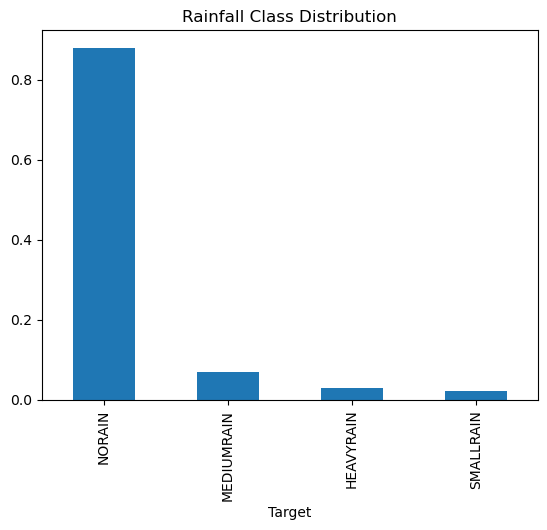

In [19]:
train["Target"].value_counts(normalize=True).plot(kind="bar")
plt.title("Rainfall Class Distribution")
plt.show()

In [32]:
# %%
# 1. Handle Missing Values in Categorical Columns
# Fill missing indicators with 'None' to treat it as a category
train['indicator'] = train['indicator'].fillna('None')
test['indicator'] = test['indicator'].fillna('None')

In [33]:
# Fill missing descriptions with empty string
train['indicator_description'] = train['indicator_description'].fillna('')
test['indicator_description'] = test['indicator_description'].fillna('')

In [34]:
# 2. Convert Date Columns
train['prediction_time'] = pd.to_datetime(train['prediction_time'])
test['prediction_time'] = pd.to_datetime(test['prediction_time'])

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10928 entries, 0 to 10927
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     10928 non-null  object        
 1   user_id                10928 non-null  int64         
 2   confidence             10928 non-null  float64       
 3   predicted_intensity    10928 non-null  float64       
 4   community              10928 non-null  object        
 5   district               10928 non-null  object        
 6   prediction_time        10928 non-null  datetime64[ns]
 7   indicator              10928 non-null  object        
 8   indicator_description  10928 non-null  object        
 9   time_observed          72 non-null     object        
 10  Target                 10928 non-null  object        
 11  forecast_length        10928 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory

## Exploratory Data Analysis (EDA)

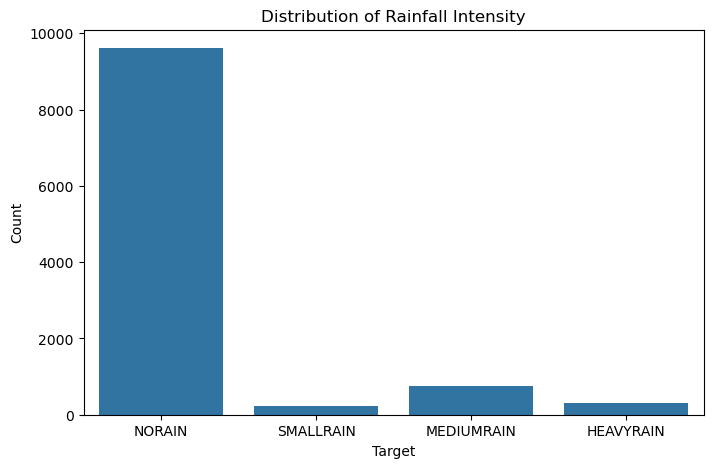

In [24]:
# 4.1 Target Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Target', data=train, order=['NORAIN', 'SMALLRAIN', 'MEDIUMRAIN', 'HEAVYRAIN'])
plt.title('Distribution of Rainfall Intensity')
plt.ylabel('Count')
plt.show()

- Insight: The dataset is HIGHLY imbalanced. 'NORAIN' dominates.

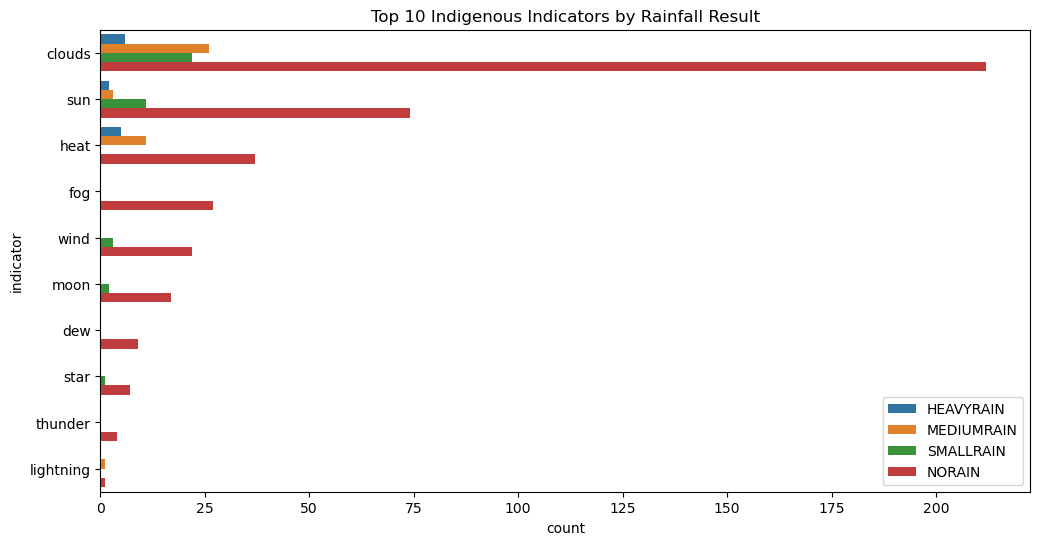

In [25]:
# 4.2 Indigenous Indicators vs Rainfall
# Let's filter out 'None' to see which indicators actually signal rain
subset = train[train['indicator'] != 'None']

plt.figure(figsize=(12, 6))
sns.countplot(y='indicator', hue='Target', data=subset, order=subset['indicator'].value_counts().index[:10])
plt.title('Top 10 Indigenous Indicators by Rainfall Result')
plt.legend(loc='lower right')
plt.show()

- Insight: 'clouds' and 'sun' are the most common indicators.

## Feature Engineering

In [35]:
def extract_date_features(df):
    df['month'] = df['prediction_time'].dt.month
    df['day_of_year'] = df['prediction_time'].dt.dayofyear
    df['hour'] = df['prediction_time'].dt.hour
    df['day_of_week'] = df['prediction_time'].dt.dayofweek
    return df

# Apply feature extraction
train = extract_date_features(train)
test = extract_date_features(test)

- Drop columns that won't be used for training
- 'ID' is just an identifier
- 'user_id' might overfit to specific users
- 'time_observed' is too sparse

In [36]:
drop_cols = ['ID', 'user_id', 'indicator_description', 'time_observed', 'prediction_time']
X = train.drop(columns=drop_cols + ['Target'])
y = train['Target']
X_test_submission = test.drop(columns=drop_cols)

print("Features selected:", X.columns.tolist())

Features selected: ['confidence', 'predicted_intensity', 'community', 'district', 'indicator', 'forecast_length', 'month', 'day_of_year', 'hour', 'day_of_week']


In [37]:
# ## 6. Data Preprocessing Pipeline
# We need to encode categorical variables (`community`, `district`, `indicator`) and scale numerical ones.

# Identify column types
categorical_cols = ['community', 'district', 'indicator']
numerical_cols = ['confidence', 'predicted_intensity', 'forecast_length', 'month', 'day_of_year', 'hour', 'day_of_week']

In [38]:
# Create Transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Encode Target Label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# View mapping
print("Target Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Target Mapping: {'HEAVYRAIN': 0, 'MEDIUMRAIN': 1, 'NORAIN': 2, 'SMALLRAIN': 3}


In [53]:
y_encoded

array([1, 0, 1, ..., 2, 2, 2])

## Model Building

In [39]:
# 7. Model Building & Cross-Validation

# Split Data for local validation
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

In [40]:
print("Training Models with Stratified Cross-Validation...")

for name, model in models.items():
    # Create pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
    # Train on split
    clf.fit(X_train, y_train)
    
    # Validate
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    results[name] = acc
    
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))

Training Models with Stratified Cross-Validation...

Model: Logistic Regression
Accuracy: 0.8737
              precision    recall  f1-score   support

   HEAVYRAIN       0.43      0.83      0.56        63
  MEDIUMRAIN       0.54      0.64      0.59       152
      NORAIN       0.99      0.89      0.94      1923
   SMALLRAIN       0.28      0.90      0.42        48

    accuracy                           0.87      2186
   macro avg       0.56      0.81      0.63      2186
weighted avg       0.93      0.87      0.89      2186


Model: Random Forest
Accuracy: 0.9854
              precision    recall  f1-score   support

   HEAVYRAIN       0.98      0.95      0.97        63
  MEDIUMRAIN       0.92      0.95      0.94       152
      NORAIN       0.99      0.99      0.99      1923
   SMALLRAIN       0.95      0.85      0.90        48

    accuracy                           0.99      2186
   macro avg       0.96      0.94      0.95      2186
weighted avg       0.99      0.99      0.99      

In [41]:
# Let's choose Random Forest as the final model
final_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42))])

# Train on FULL dataset
final_model.fit(X, y_encoded)

print("Final model trained on all data.")

Final model trained on all data.


### Model Building on XGBoost

In [46]:
import xgboost as xgb

# Define the XGBoost Classifier
# We use 'objective': 'multi:softmax' for multi-class classification
xgb_classifier = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),  # Number of classes (4 in this case)
    eval_metric='mlogloss',                 # Metric to minimize
    random_state=42,
    use_label_encoder=False
)

# Create the full pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_classifier)
])

# Train the model
print("Training XGBoost Model...")
xgb_pipeline.fit(X_train, y_train)

# Evaluate
y_pred_xgb = xgb_pipeline.predict(X_val)
f1_macro_xgb = f1_score(y_val, y_pred_xgb, average='macro')

print(f"XGBoost F1 Score (Macro): {f1_macro_xgb:.4f}")
print(classification_report(y_val, y_pred_xgb, target_names=label_encoder.classes_))

Training XGBoost Model...
XGBoost F1 Score (Macro): 0.9618
              precision    recall  f1-score   support

   HEAVYRAIN       0.98      0.98      0.98        63
  MEDIUMRAIN       0.98      0.91      0.95       152
      NORAIN       0.99      1.00      0.99      1923
   SMALLRAIN       0.98      0.88      0.92        48

    accuracy                           0.99      2186
   macro avg       0.98      0.94      0.96      2186
weighted avg       0.99      0.99      0.99      2186



### Cross-Validation

In [55]:
from xgboost import XGBClassifier

In [56]:
import xgboost as xgb

# 1. Define the CV strategy
cv_strategy = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# 2. Define the XGBoost Pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Ensure this preprocessor is the one defined earlier
    ('classifier', xgb.XGBClassifier(
        n_estimators=1000,
        learning_rate=0.1,
        max_depth=5,
        objective='multi:softmax',
        num_class=4, # Number of target classes
        eval_metric='mlogloss',
        random_state=42,
        use_label_encoder=False
    ))
])

# 3. Run Cross-Validation
print("Running 20-Fold CV for XGBoost...")
scores = cross_val_score(xgb_pipeline, X, y_encoded, cv=cv_strategy, scoring='f1_macro', n_jobs=-1)

# 4. Report Results
print(f"XGBoost Mean F1 Macro: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

Running 20-Fold CV for XGBoost...
XGBoost Mean F1 Macro: 0.9706
Standard Deviation: 0.0115


## Hyper-Parameter Tuning Using Optuna

In [57]:
import optuna
import xgboost as xgb

def objective(trial):
    # 1. Define the Search Space
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        # Fixed parameters
        'objective': 'multi:softmax',
        'num_class': 4,
        'eval_metric': 'mlogloss',
        'random_state': 42,
        'use_label_encoder': False,
        'n_jobs': -1
    }

    # 2. Create Pipeline with these params
    # Note: 'preprocessor' must be defined before running this
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', xgb.XGBClassifier(**param))
    ])
    
    # 3. Cross-Validation (3-fold for speed during tuning)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y_encoded, cv=cv, scoring='f1_macro')
    
    return scores.mean()

# 4. Run Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50) # Run 50 experiments

print("Best Trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2026-01-22 15:26:54,931] A new study created in memory with name: no-name-cb4ebf32-6fbb-4480-a771-9bc64cf50e3e
[I 2026-01-22 15:26:59,142] Trial 0 finished with value: 0.8593009715195933 and parameters: {'n_estimators': 411, 'max_depth': 4, 'learning_rate': 0.19360561421585273, 'subsample': 0.54870180189312, 'colsample_bytree': 0.657236825774169, 'gamma': 4.363941948583298, 'min_child_weight': 1}. Best is trial 0 with value: 0.8593009715195933.
[I 2026-01-22 15:27:07,693] Trial 1 finished with value: 0.9131019221829381 and parameters: {'n_estimators': 990, 'max_depth': 8, 'learning_rate': 0.27093555147916376, 'subsample': 0.5273787049494794, 'colsample_bytree': 0.6856252153123128, 'gamma': 1.466465494365274, 'min_child_weight': 3}. Best is trial 1 with value: 0.9131019221829381.
[I 2026-01-22 15:27:17,089] Trial 2 finished with value: 0.9313435164095979 and parameters: {'n_estimators': 989, 'max_depth': 7, 'learning_rate': 0.17311015367699967, 'subsample': 0.8328072810970755, 'colsa

Best Trial:
  Value: 0.9615944937510413
  Params: 
    n_estimators: 166
    max_depth: 7
    learning_rate: 0.29222896222670636
    subsample: 0.7191457777546555
    colsample_bytree: 0.6698285187076998
    gamma: 0.0013388765602434446
    min_child_weight: 2
